In [5]:
a = 1
gamma = 2
beta = 3
theta = 1
mu = -3
nu = 1
v = 2

# 1 Задание. МНК

Параметры параболы: c0 = -1.260000000004878, c1 = 1.9571428571449276, c2 = 0.0035714285692568515


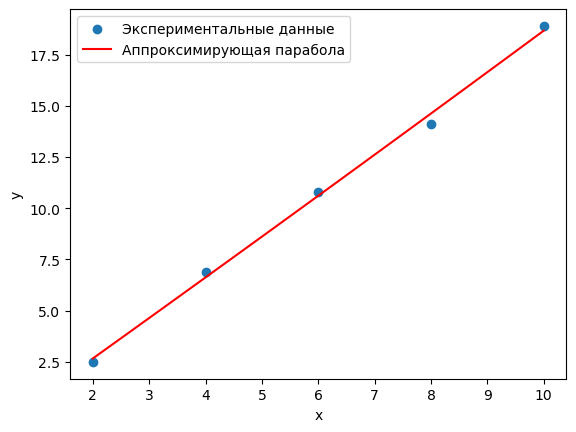

Параметры экспоненты: a = 3.195609326367384, b = 1.198352199996416


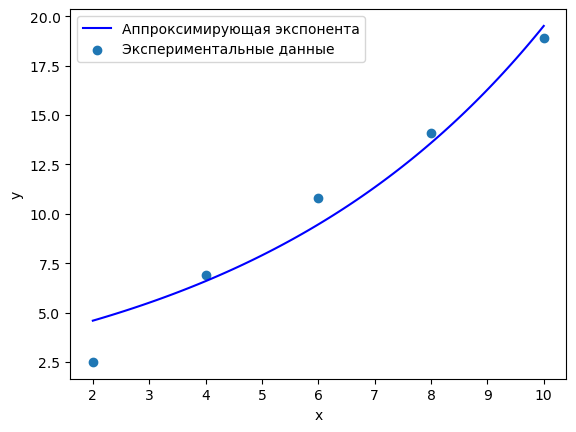

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Данные
x = np.array([v, v+2, v+4, v+6, v+8])
y = np.array([gamma+0.5, gamma+4.9, gamma+8.8, gamma+12.1, gamma+16.9])

# Аппроксимация параболой: y = c0 + c1*x + c2*x^2
def parabola(x, c0, c1, c2):
    return c0 + c1*x + c2*x**2

# Подбор параметров методом наименьших квадратов
params, _ = curve_fit(parabola, x, y)

# Вывод коэффициентов
c0, c1, c2 = params
print(f"Параметры параболы: c0 = {c0}, c1 = {c1}, c2 = {c2}")

# Построение графика аппроксимирующей параболы
x_fit = np.linspace(min(x), max(x), 100)
y_fit = parabola(x_fit, *params)

plt.scatter(x, y, label="Экспериментальные данные")
plt.plot(x_fit, y_fit, label="Аппроксимирующая парабола", color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Аппроксимация кривой вида y = ab^x
def exponential(x, a, b):
    return a * b**x

params_exp, _ = curve_fit(exponential, x, y)
a, b = params_exp
print(f"Параметры экспоненты: a = {a}, b = {b}")

# Построение графика экспоненты
y_exp_fit = exponential(x_fit, *params_exp)
plt.plot(x_fit, y_exp_fit, label="Аппроксимирующая экспонента", color='blue')
plt.scatter(x, y, label="Экспериментальные данные")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Задание 2. МНК

Параметры (curve_fit): a = 2.7503937522783017, b = 0.8026390233085214
Параметры (leastsq): a = 2.7503937522783017, b = 0.8026390233085214


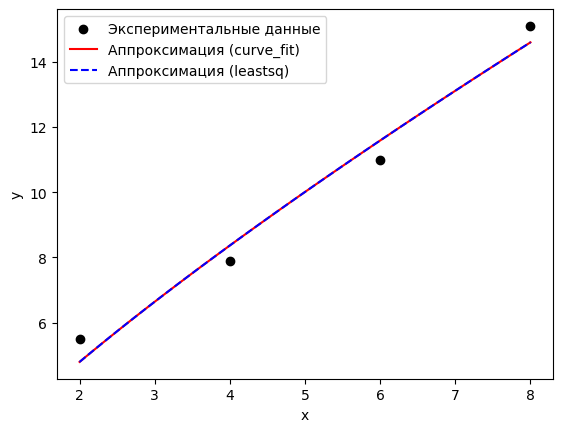

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import leastsq, curve_fit

# Данные
x = np.array([v, v + 2, v + 4, v + 6])
y = np.array([gamma + theta + 2.5, gamma + theta + 4.9, gamma + theta + 8, gamma + theta + 12.1])

# Аппроксимирующая функция y = a * x^b
def model_func(x, a, b):
    return a * x**b

# --- Метод curve_fit ---
params_curve_fit, _ = curve_fit(model_func, x, y)
a_curve_fit, b_curve_fit = params_curve_fit

# --- Метод leastsq ---
def residuals_leastsq(params, x, y):
    a, b = params
    return y - model_func(x, a, b)

initial_guess = [1, 1]  # начальные предположения для a и b
params_leastsq, _ = leastsq(residuals_leastsq, initial_guess, args=(x, y))
a_leastsq, b_leastsq = params_leastsq

# Вывод параметров
print(f"Параметры (curve_fit): a = {a_curve_fit}, b = {b_curve_fit}")
print(f"Параметры (leastsq): a = {a_leastsq}, b = {b_leastsq}")

# Построение графика
x_fit = np.linspace(min(x), max(x), 100)
y_fit_curve_fit = model_func(x_fit, a_curve_fit, b_curve_fit)
y_fit_leastsq = model_func(x_fit, a_leastsq, b_leastsq)

plt.scatter(x, y, label="Экспериментальные данные", color='black')
plt.plot(x_fit, y_fit_curve_fit, label="Аппроксимация (curve_fit)", color='red')
plt.plot(x_fit, y_fit_leastsq, label="Аппроксимация (leastsq)", color='blue', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# 3 Задание

<>:63: SyntaxWarning: invalid escape sequence '\l'
<>:63: SyntaxWarning: invalid escape sequence '\l'
C:\Temp\ipykernel_6380\4072383147.py:63: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(x_fit, logarithmic(x_fit, *params_logarithmic), label=f"Логарифм: $y = {a_log:.2f} + {b_log:.2f}\ln(x)$\nK = {K_logarithmic:.2f}", color='green')


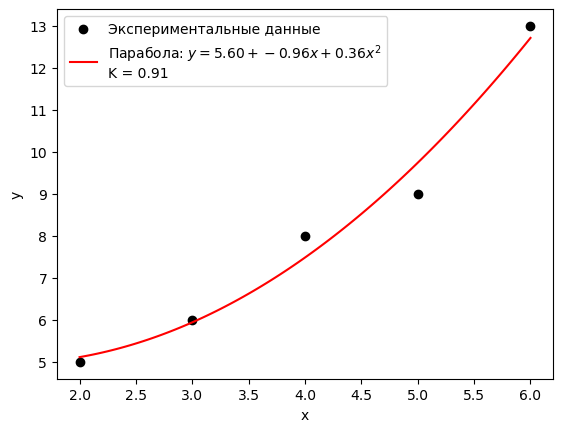

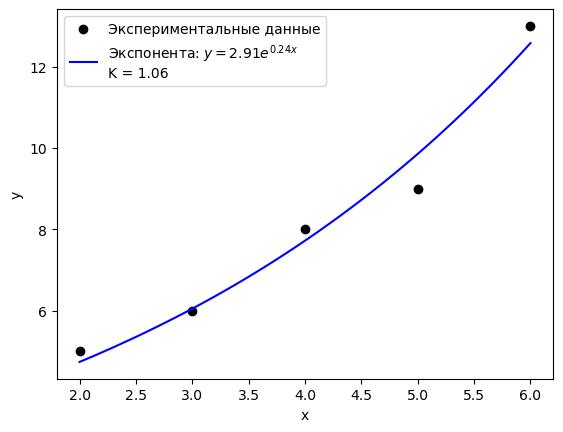

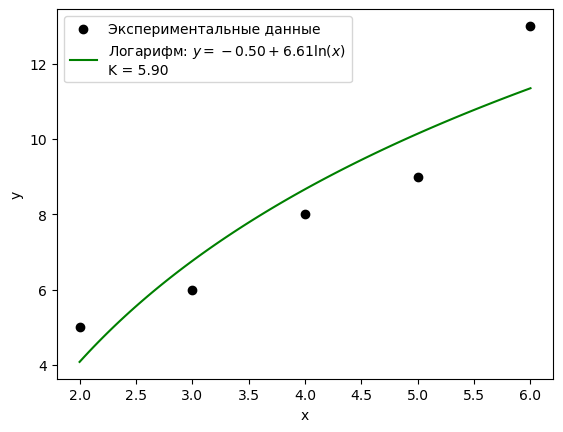

Критерий K для параболы: 0.91
Критерий K для экспоненты: 1.06
Критерий K для логарифмической кривой: 5.90


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Данные
x = np.array([v, v + 1, v + 2, v + 3, v + 4])
y = np.array([gamma + beta, gamma + beta + 1, gamma + beta + 3, gamma + beta + 4, gamma + beta + 8])

# --- 1. Аппроксимация параболой: y = c_0 + c_1*x + c_2*x^2 ---
def parabola(x, c0, c1, c2):
    return c0 + c1*x + c2*x**2

params_parabola, _ = curve_fit(parabola, x, y)
c0, c1, c2 = params_parabola

# Вычисление критерия K для параболы
y_fit_parabola = parabola(x, *params_parabola)
K_parabola = np.sum((y - y_fit_parabola)**2)

# --- 2. Аппроксимация экспонентой: y = ae^(bx) ---
def exponential(x, a, b):
    return a * np.exp(b * x)

params_exponential, _ = curve_fit(exponential, x, y)
a_exp, b_exp = params_exponential

# Вычисление критерия K для экспоненты
y_fit_exp = exponential(x, *params_exponential)
K_exponential = np.sum((y - y_fit_exp)**2)

# --- 3. Аппроксимация логарифмической кривой: y = a + b*ln(x) ---
def logarithmic(x, a, b):
    return a + b * np.log(x)

params_logarithmic, _ = curve_fit(logarithmic, x, y)
a_log, b_log = params_logarithmic

# Вычисление критерия K для логарифмической кривой
y_fit_log = logarithmic(x, *params_logarithmic)
K_logarithmic = np.sum((y - y_fit_log)**2)

# Построение графиков
x_fit = np.linspace(min(x), max(x), 100)

# Парабола
plt.scatter(x, y, label="Экспериментальные данные", color='black')
plt.plot(x_fit, parabola(x_fit, *params_parabola), label=f"Парабола: $y = {c0:.2f} + {c1:.2f}x + {c2:.2f}x^2$\nK = {K_parabola:.2f}", color='red')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Экспонента
plt.scatter(x, y, label="Экспериментальные данные", color='black')
plt.plot(x_fit, exponential(x_fit, *params_exponential), label=f"Экспонента: $y = {a_exp:.2f}e^{{{b_exp:.2f}x}}$\nK = {K_exponential:.2f}", color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Логарифмическая кривая
plt.scatter(x, y, label="Экспериментальные данные", color='black')
plt.plot(x_fit, logarithmic(x_fit, *params_logarithmic), label=f"Логарифм: $y = {a_log:.2f} + {b_log:.2f}\ln(x)$\nK = {K_logarithmic:.2f}", color='green')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Вывод значений K
print(f"Критерий K для параболы: {K_parabola:.2f}")
print(f"Критерий K для экспоненты: {K_exponential:.2f}")
print(f"Критерий K для логарифмической кривой: {K_logarithmic:.2f}") 